# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.633  1  0.931 0.336 0.005   
                             age        0.035  1  0.052 0.820 0.000   
                             Kiel       2.253  1  3.315 0.070 0.017   
                             Magdeburg  5.871  1  8.639 0.004 0.043   
                             Sweden    10.533  1 15.498 0.000 0.075   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.795  1  0.798 0.373 0.004   
                             age        0.835  1  0.838 0.361 0.004   
                             Kiel       0.537  1  0.538 0.464 0.003   
                             Magdeburg  3.819  1  3.831 0.052 0.020   
                             Sweden     4.139  1  4.153 0.043 0.021   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.474  0.502    False  
                             age               0.086  0.894    False  
                             Kiel              1.154  0.159    False  
                             Magdeburg         2.432  0.015     True  
                             Sweden            3.937  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.428  0.538    False  
                             age               0.442  0.526    False  
                             Kiel              0.333  0.619    False  
                             Magdeburg         1.286  0.125    False  
                             Sweden            1.367  0.108    False  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.705  1  4.314 0.039 0.022   
                             age        0.017  1  0.101 0.750 0.001   
                             Kiel       0.471  1  2.882 0.091 0.015   
                             Magdeburg  1.017  1  6.222 0.013 0.032   
                             Sweden     2.631  1 16.098 0.000 0.078   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.852  1  0.417 0.519 0.002   
                             age        1.953  1  0.956 0.329 0.005   
                             Kiel       8.269  1  4.048 0.046 0.021   
                             Magdeburg 18.484  1  9.049 0.003 0.045   
                             Sweden     0.071  1  0.035 0.853 0.000   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.407  0.094    False  
                             age               0.125  0.835    False  
                             Kiel              1.040  0.183    False  
                             Magdeburg         1.871  0.039     True  
                             Sweden            4.064  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.285  0.654    False  
                             age               0.482  0.480    False  
                             Kiel              1.341  0.106    False  
                             Magdeburg         2.525  0.011     True  
                             Sweden            0.069  0.907    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.336         0.474  0.502    False   
                             Kiel      0.070         1.154  0.159    False   
                             Magdeburg 0.004         2.432  0.015     True   
                             Sweden    0.000         3.937  0.001     True   
                             age       0.820         0.086  0.894    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.373         0.428  0.538    False   
                             Kiel      0.464         0.333  0.619    False   
                             Magdeburg 0.052         1.286  0.125    False   
                             Sweden    0.043         1.367  0.108    False   
                             age       0.361         0.442  0.526    False   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.039         1.407  0.094    False  
                             Kiel      0.091         1.040  0.183    False  
                             Magdeburg 0.013         1.871  0.039     True  
                             Sweden    0.000         4.064  0.001     True  
                             age       0.750         0.125  0.835    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.519         0.285  0.654    False  
                             Kiel      0.046         1.341  0.106    False  
                             Magdeburg 0.003         2.525  0.011     True  
                             Sweden    0.853         0.069  0.907    False  
                             age       0.329         0.482  0.480    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.262         2.481     0.339     0.245         2.748     0.311
std       0.304         5.331     0.332     0.298         5.182     0.325
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.332     0.015     0.002         0.359     0.008
50%       0.119         0.923     0.239     0.093         1.029     0.187
75%       0.465         2.416     0.620     0.438         2.710     0.583
max       1.000       149.342     1.000     0.999        84.138     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_80365/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.336         0.474   
A0A024R0T9;K7ER74;P02655                           AD     0.043         1.364   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.072         1.144   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.586         0.232   
A0A075B6H7                                         AD     0.111         0.955   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.032         1.495   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.409         0.388   
S4R3U6                                             AD     0.373         0.428   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.502    False   
A0A024R0T9;K7ER74;P02655                           AD      0.109    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.161    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.724    False   
A0A075B6H7                                         AD      0.227    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.318    False   
Q9Y6X5                                             AD      0.086    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.182    False   
Q9Y6Y9                                             AD      0.572    False   
S4R3U6                                             AD      0.538    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.039         1.407   
A0A024R0T9;K7ER74;P02655                           AD     0.028         1.560   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.311         0.508   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.297         0.528   
A0A075B6H7                                         AD     0.158         0.802   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.046         1.333   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.697         0.157   
S4R3U6                                             AD     0.519         0.285   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.094    False  
A0A024R0T9;K7ER74;P02655                           AD      0.071    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.460    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.446    False  
A0A075B6H7                                         AD      0.277    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.255         1.414     0.336     0.244         1.505     0.317
std       0.296         1.648     0.321     0.285         1.794     0.311
min       0.000         0.001     0.000     0.000         0.001     0.000
25%       0.011         0.365     0.038     0.009         0.360     0.029
50%       0.116         0.934     0.234     0.110         0.959     0.212
75%       0.432         1.941     0.592     0.436         2.031     0.582
max       0.998        23.733     0.999     0.999        25.796     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model        PI    QRILC
var    rejected rejected
count      1421     1421
unique        2        2
top       False    False
freq       1025      992

## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

data
                                                   frequency
protein groups                                              
A0A024QZX5;A0A087X1N8;P35237                             186
A0A024R0T9;K7ER74;P02655                                 195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...       174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                  196
A0A075B6H7                                                91
...                                                      ...
Q9Y6R7                                                   197
Q9Y6X5                                                   173
Q9Y6Y8;Q9Y6Y8-2                                          197
Q9Y6Y9                                                   119
S4R3U6                                                   126

[1421 rows x 1 columns]

## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.336         0.474  0.502   
A0A024R0T9;K7ER74;P02655                           0.043         1.364  0.109   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.072         1.144  0.161   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.586         0.232  0.724   
A0A075B6H7                                         0.111         0.955  0.227   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.318   
Q9Y6X5                                             0.032         1.495  0.086   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.182   
Q9Y6Y9                                             0.409         0.388  0.572   
S4R3U6                                             0.373         0.428  0.538   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.039   
A0A024R0T9;K7ER74;P02655                              False 0.028   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.311   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.297   
A0A075B6H7                                            False 0.158   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.046   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.697   
S4R3U6                                                False 0.519   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.407  0.094   
A0A024R0T9;K7ER74;P02655                                   1.560  0.071   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.508  0.460   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.528  0.446   
A0A075B6H7                                                 0.802  0.277   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.301   
Q9Y6X5                                                     1.333  0.107   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.171   
Q9Y6Y9                                                     0.157  0.797   
S4R3U6                                                     0.285  0.654   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    954
PI (yes) - QRILC (yes)   358
PI (no)  - QRILC (yes)    71
PI (yes) - QRILC (no)     38
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_80365/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A075B6I0                                         0.027         1.575  0.074   
A0A075B6J9                                         0.027         1.563  0.076   
A0A087WUM0;A0A087WX56;A0A087WYV9;A0A087X1F5;Q9P0S2 0.014         1.840  0.045   
A0A087WWT2;Q9NPD7                                  0.049         1.310  0.120   
A0A087X0M8                                         0.042         1.375  0.106   
...                                                  ...           ...    ...   
Q9UJ14                                             0.026         1.593  0.072   
Q9UKB5                                             0.006         2.234  0.022   
Q9ULP0-3;Q9ULP0-6                                  0.023         1.635  0.067   
Q9UQ52                                             0.073         1.134  0.164   
Q9Y281;Q9Y281-3                                    0.000         3.368  0.002   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A075B6I0                                            False 0.002   
A0A075B6J9                                            False 0.006   
A0A087WUM0;A0A087WX56;A0A087WYV9;A0A087X1F5;Q9P0S2     True 0.124   
A0A087WWT2;Q9NPD7                                     False 0.007   
A0A087X0M8                                            False 0.005   
...                                                     ...   ...   
Q9UJ14                                                False 0.010   
Q9UKB5                                                 True 0.069   
Q9ULP0-3;Q9ULP0-6                                     False 0.005   
Q9UQ52                                                False 0.005   
Q9Y281;Q9Y281-3                                        True 0.405   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A075B6I0                                                 2.743  0.007   
A0A075B6J9                                                 2.244  0.019   
A0A087WUM0;A0A087WX56;A0A087WYV9;A0A087X1F5;Q9P0S2         0.907  0.231   
A0A087WWT2;Q9NPD7                                          2.183  0.022   
A0A087X0M8                                                 2.280  0.018   
...                                                          ...    ...   
Q9UJ14                                                     1.985  0.032   
Q9UKB5                                                     1.160  0.147   
Q9ULP0-3;Q9ULP0-6                                          2.324  0.017   
Q9UQ52                                                     2.285  0.018   
Q9Y281;Q9Y281-3                                            0.393  0.552   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A075B6I0                                             True       194  
A0A075B6J9                                             True       156  
A0A087WUM0;A0A087WX56;A0A087WYV9;A0A087X1F5;Q9P0S2    False       165  
A0A087WWT2;Q9NPD7                                      True       193  
A0A087X0M8                                             True       189  
...                                                     ...       ...  
Q9UJ14                                                 True       169  
Q9UKB5                                                False       148  
Q9ULP0-3;Q9ULP0-6                                      True       136  
Q9UQ52                               

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

PI  QRILC  frequency  \
protein groups                                                               
A0A024QZX5;A0A087X1N8;P35237                       0.502  0.094        186   
A0A024R0T9;K7ER74;P02655                           0.109  0.071        195   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.161  0.460        174   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.724  0.446        196   
A0A075B6H7                                         0.227  0.277         91   
...                                                  ...    ...        ...   
Q9Y6R7                                             0.318  0.301        197   
Q9Y6X5                                             0.086  0.107        173   
Q9Y6Y8;Q9Y6Y8-2                                    0.182  0.171        197   
Q9Y6Y9                                             0.572  0.797        119   
S4R3U6                                             0.538  0.654        126   

                                                   Differential Analysis Comparison  
protein groups                                                                       
A0A024QZX5;A0A087X1N8;P35237                                 PI (no)  - QRILC (no)   
A0A024R0T9;K7ER74;P02655                                     PI (no)  - QRILC (no)   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...           PI (no)  - QRILC (no)   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                      PI (no)  - QRILC (no)   
A0A075B6H7                                                   PI (no)  - QRILC (no)   
...                                                                             ...  
Q9Y6R7                                                       PI (no)  - QRILC (no)   
Q9Y6X5                                                       PI (no)  - QRILC (no)   
Q9Y6Y8;Q9Y6Y8-2                                              PI (no)  - QRILC (no)   
Q9Y6Y9                                                       PI (no)  - QRILC (no)   
S4R3U6                                                       PI (no)  - QRILC (no)   

[1421 rows x 4 columns]

List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

PI  QRILC  frequency  \
protein groups                                                
Q14517                              0.006  0.990         53   
J3KSJ8;Q9UD71;Q9UD71-2              0.892  0.013         51   
P06702                              0.764  0.039         97   
Q9Y281;Q9Y281-3                     0.002  0.552         51   
A0A1W2PQ94;B4DS77;B4DS77-2;B4DS77-3 0.534  0.012         69   
...                                   ...    ...        ...   
P02743                              0.066  0.041        195   
Q6UWH4;Q6UWH4-2                     0.057  0.038        190   
Q9P0K9                              0.052  0.035        192   
K7ERG9;P00746                       0.052  0.048        197   
P00740;P00740-2                     0.053  0.049        197   

                                    Differential Analysis Comparison  \
protein groups                                                         
Q14517                                        PI (yes) - QRILC (no)    
J3KSJ8;Q9UD71;Q9UD71-2                        PI (no)  - QRILC (yes)   
P06702                                        PI (no)  - QRILC (yes)   
Q9Y281;Q9Y281-3                               PI (yes) - QRILC (no)    
A0A1W2PQ94;B4DS77;B4DS77-2;B4DS77-3           PI (no)  - QRILC (yes)   
...                                                              ...   
P02743                                        PI (no)  - QRILC (yes)   
Q6UWH4;Q6UWH4-2                               PI (no)  - QRILC (yes)   
Q9P0K9                                        PI (no)  - QRILC (yes)   
K7ERG9;P00746                                 PI (no)  - QRILC (yes)   
P00740;P00740-2                               PI (no)  - QRILC (yes)   

                                     diff_qvalue  
protein groups                                    
Q14517                                     0.984  
J3KSJ8;Q9UD71;Q9UD71-2                     0.879  
P06702                                     0.725  
Q9Y281;Q9Y281-3                            0.550  
A0A1W2PQ94;B4DS77;B4DS77-2;B4DS77-3        0.522  
...                                          ...  
P02743                                     0.024  
Q6UWH4;Q6UWH4-2                            0.019  
Q9P0K9                                     0.017  
K7ERG9;P00746                              0.004  
P00740;P00740-2                            0.004  

[109 rows x 5 columns]

### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


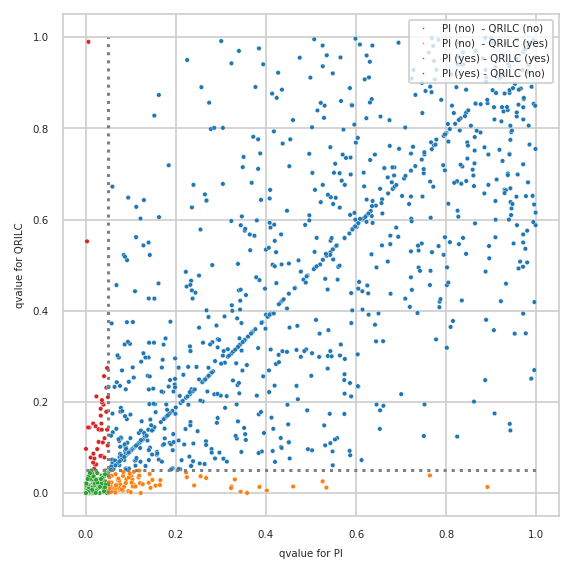

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


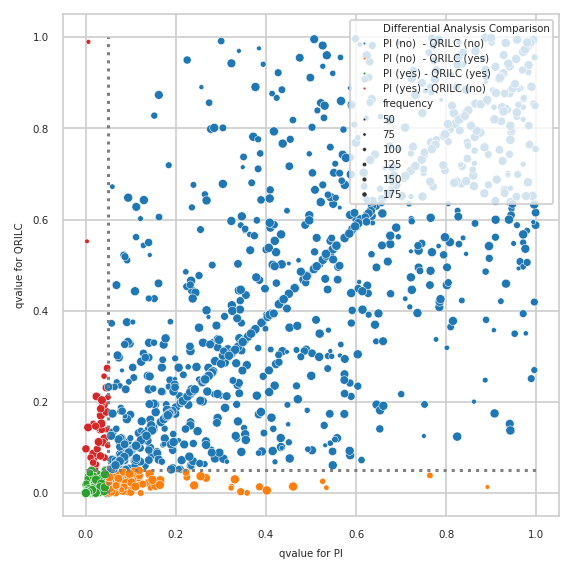

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


ENSP  score
None                            
APOE      ENSP00000252486  5.000
PSEN2     ENSP00000355747  5.000
PSEN1     ENSP00000326366  5.000
APP       ENSP00000284981  5.000
TREM2     ENSP00000362205  4.825
...                   ...    ...
ERP27     ENSP00000266397  0.681
ZNF585B   ENSP00000433773  0.681
KIR3DL2   ENSP00000325525  0.681
C12orf66  ENSP00000311486  0.681
ELP2      ENSP00000414851  0.681

[10000 rows x 2 columns]

## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/924ec7e362d761ecf0807b9074d79999_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out